In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')
df.head()

,Churn,AccountWeeks,ContractRenewal,DataPlan,DataUsage,CustServCalls,DayMins,DayCalls,MonthlyCharge,OverageFee,RoamMins
0,0,128,1,1,2.7,1,265.1,110,89.0,9.87,10.0
1,0,107,1,1,3.7,1,161.6,123,82.0,9.78,13.7
2,0,137,1,0,0.0,0,243.4,114,52.0,6.06,12.2
3,0,84,0,0,0.0,2,299.4,71,57.0,3.10,6.6
4,0,75,0,0,0.0,3,166.7,113,41.0,7.42,10.1


In [5]:
df.isnull().sum()

Churn              0
AccountWeeks       0
ContractRenewal    0
DataPlan           0
DataUsage          0
CustServCalls      0
DayMins            0
DayCalls           0
MonthlyCharge      0
OverageFee         0
RoamMins           0
dtype: int64

In [7]:
df = pd.get_dummies(df, drop_first=True)

In [9]:
X = df.drop('Churn', axis=1)  # 'Churn' is the target variable
y = df['Churn']

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

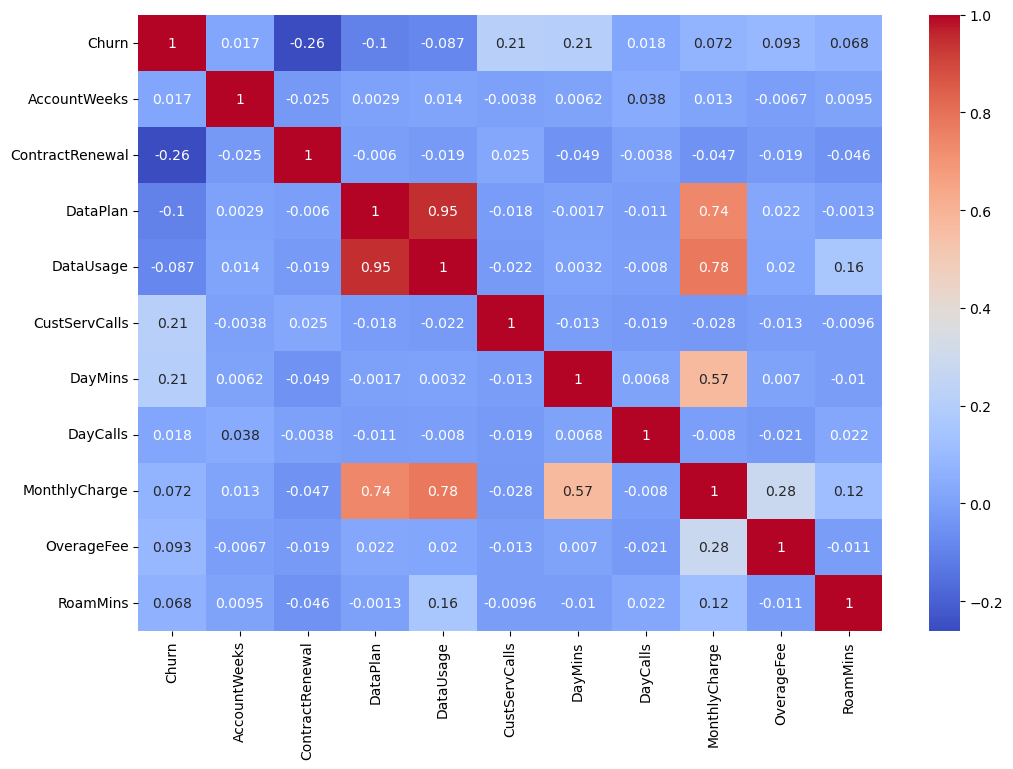

In [13]:
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.show()

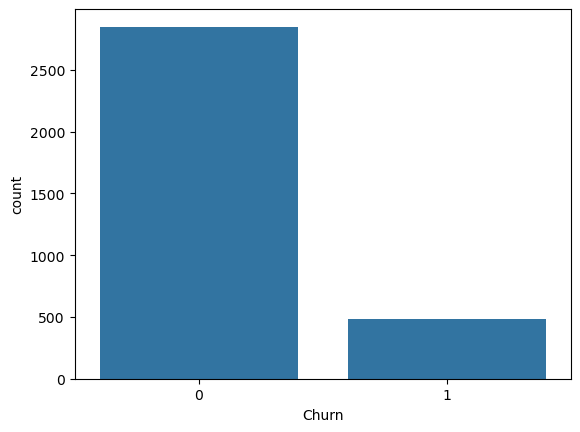

In [15]:
sns.countplot(x='Churn', data=df)
plt.show()

In [51]:
churn_percentage = df['Churn'].value_counts(normalize=True) * 100
print(f"Churn Percentage:\n{churn_percentage}")

Churn Percentage:
Churn
0    85.508551
1    14.491449
Name: proportion, dtype: float64


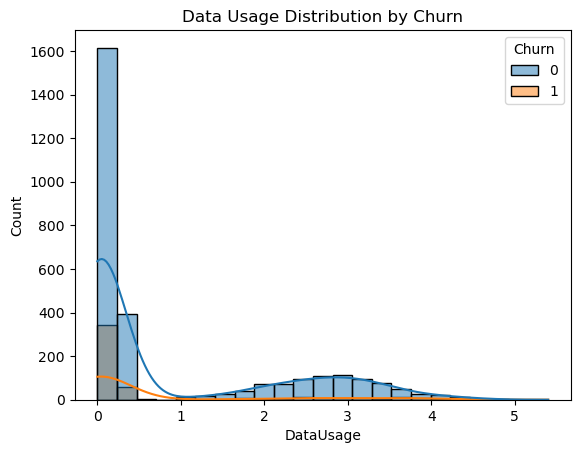

In [53]:
sns.histplot(data=df, x='DataUsage', hue='Churn', kde=True)
plt.title('Data Usage Distribution by Churn')
plt.show()

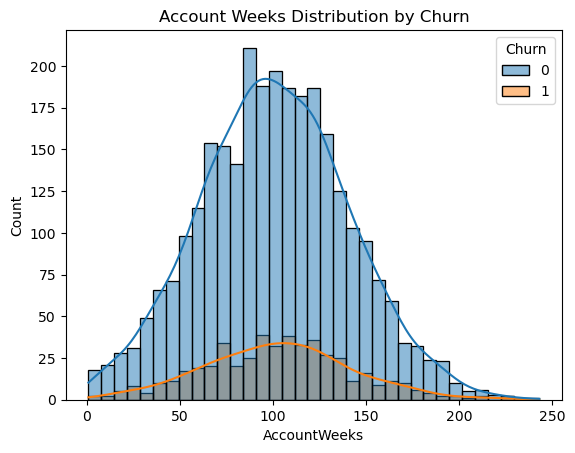

In [55]:
sns.histplot(data=df, x='AccountWeeks', hue='Churn', kde=True)
plt.title('Account Weeks Distribution by Churn')
plt.show()


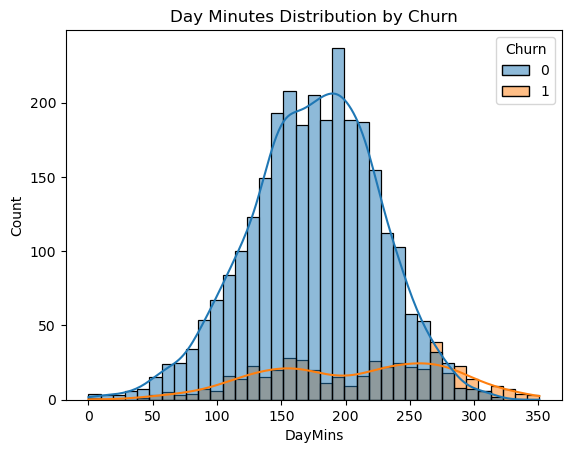

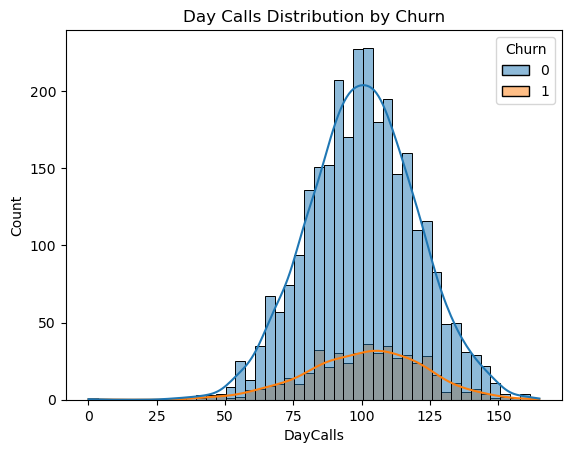

In [57]:
# Day Minutes Distribution
sns.histplot(data=df, x='DayMins', hue='Churn', kde=True)
plt.title('Day Minutes Distribution by Churn')
plt.show()

# Day Calls Distribution
sns.histplot(data=df, x='DayCalls', hue='Churn', kde=True)
plt.title('Day Calls Distribution by Churn')
plt.show()


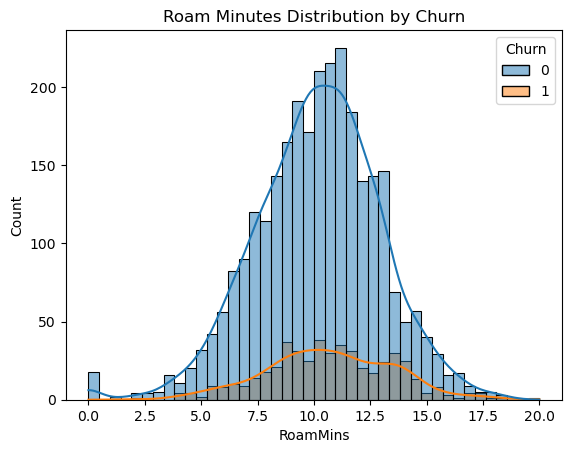

In [59]:
sns.histplot(data=df, x='RoamMins', hue='Churn', kde=True)
plt.title('Roam Minutes Distribution by Churn')
plt.show()


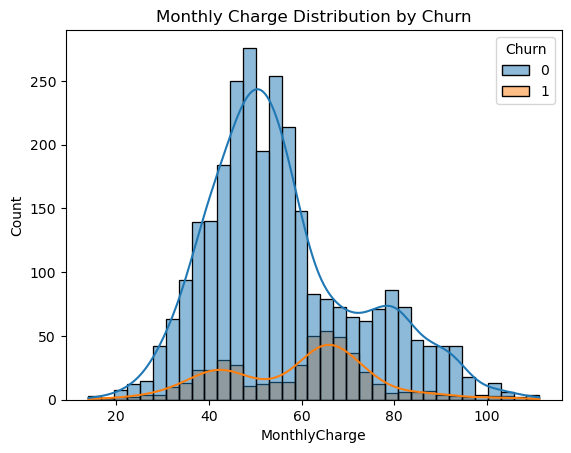

In [61]:
sns.histplot(data=df, x='MonthlyCharge', hue='Churn', kde=True)
plt.title('Monthly Charge Distribution by Churn')
plt.show()


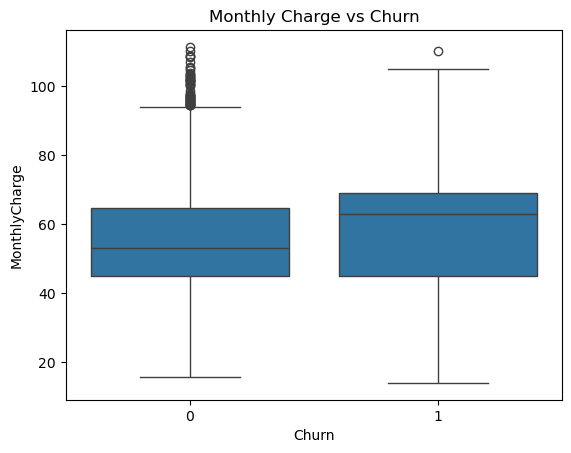

In [63]:
sns.boxplot(x='Churn', y='MonthlyCharge', data=df)
plt.title('Monthly Charge vs Churn')
plt.show()


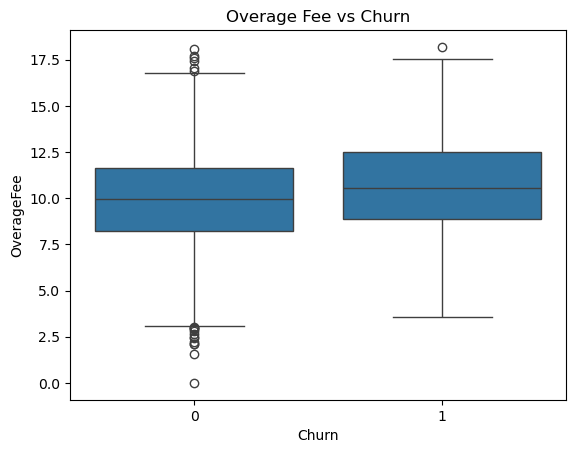

In [65]:
sns.boxplot(x='Churn', y='OverageFee', data=df)
plt.title('Overage Fee vs Churn')
plt.show()


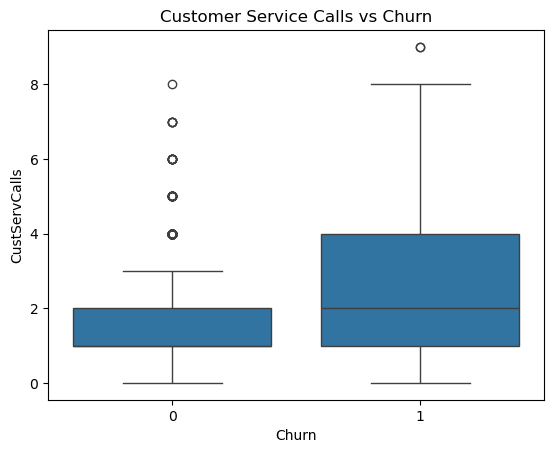

In [67]:
sns.boxplot(x='Churn', y='CustServCalls', data=df)
plt.title('Customer Service Calls vs Churn')
plt.show()


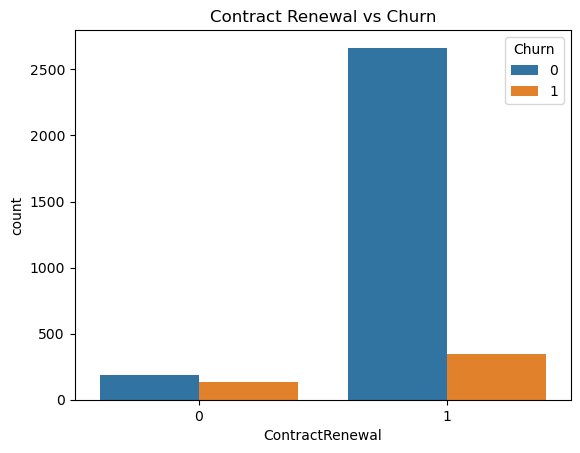

In [69]:
sns.countplot(x='ContractRenewal', hue='Churn', data=df)
plt.title('Contract Renewal vs Churn')
plt.show()


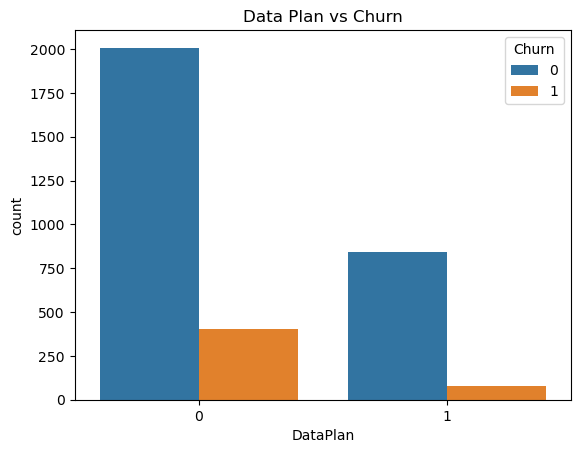

In [71]:
sns.countplot(x='DataPlan', hue='Churn', data=df)
plt.title('Data Plan vs Churn')
plt.show()


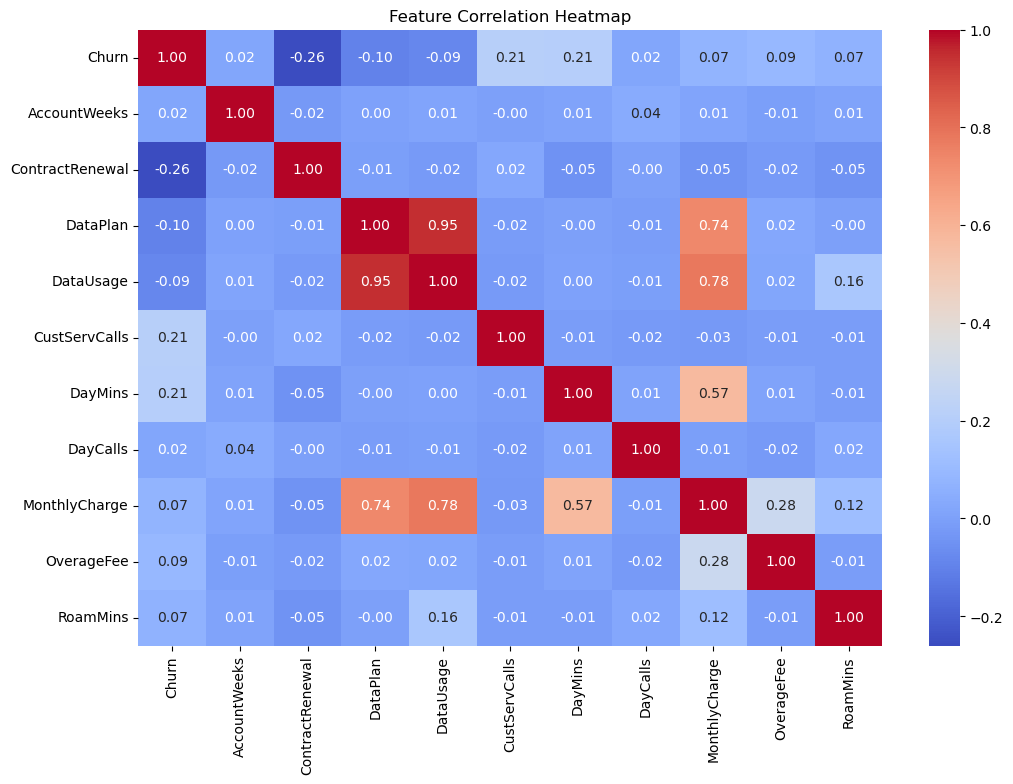

In [73]:
plt.figure(figsize=(12, 8))
corr = df.corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Feature Correlation Heatmap')
plt.show()


In [17]:
rf_model = RandomForestClassifier(random_state=42)

In [21]:
param_grid_rf = {
    'n_estimators': [100, 200, 500],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5, 10],
}

grid_rf = GridSearchCV(estimator=rf_model, param_grid=param_grid_rf, cv=5, n_jobs=-1, verbose=2)
grid_rf.fit(X_train, y_train)

Fitting 5 folds for each of 27 candidates, totalling 135 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [10, 20, None],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [100, 200, 500]},
             verbose=2)

In [22]:
print("Best Random Forest Params:", grid_rf.best_params_)
rf_best = grid_rf.best_estimator_

Best Random Forest Params: {'max_depth': 20, 'min_samples_split': 5, 'n_estimators': 100}


In [23]:
y_pred_rf = rf_best.predict(X_test)

In [27]:
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print("Random Forest Accuracy:", accuracy_rf)

Random Forest Accuracy: 0.9325337331334332


In [29]:
print(classification_report(y_test, y_pred_rf))

              precision    recall  f1-score   support

           0       0.94      0.98      0.96       566
           1       0.87      0.65      0.75       101

    accuracy                           0.93       667
   macro avg       0.90      0.82      0.85       667
weighted avg       0.93      0.93      0.93       667



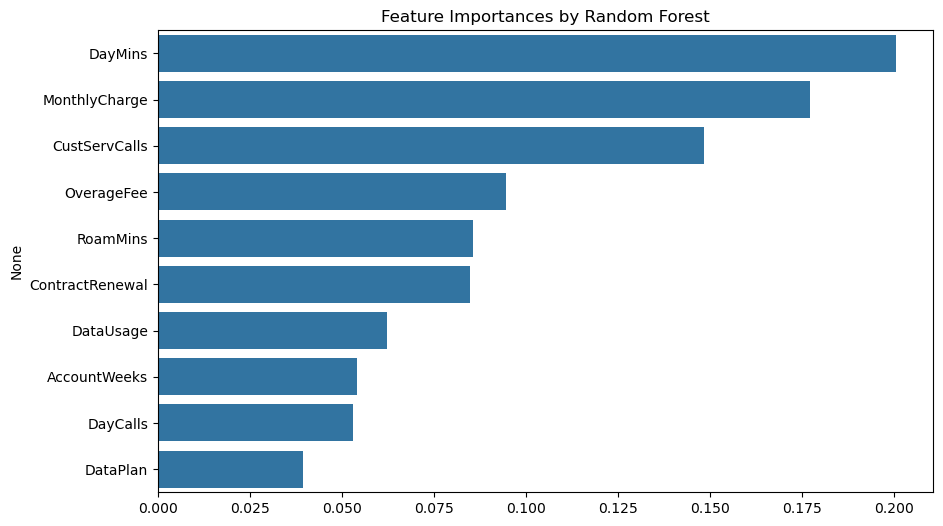

In [75]:
# Feature Importance for Random Forest
importances = rf_best.feature_importances_
features = X.columns
indices = np.argsort(importances)[::-1]

plt.figure(figsize=(10, 6))
plt.title("Feature Importances by Random Forest")
sns.barplot(x=importances[indices], y=features[indices])
plt.show()


In [31]:
xgb_model = XGBClassifier(random_state=42)

In [33]:
param_grid_xgb = {
    'n_estimators': [100, 200, 500],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 6, 10],
    'subsample': [0.8, 1.0],
}

grid_xgb = GridSearchCV(estimator=xgb_model, param_grid=param_grid_xgb, cv=5, n_jobs=-1, verbose=2)
grid_xgb.fit(X_train, y_train)

Fitting 5 folds for each of 54 candidates, totalling 270 fits


GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None,...
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None,
                                     random_state=42, ...),
             n_jobs=-1,
             param_grid={'learning_rate': [0.01, 0.1, 0.2],
                         'max_depth': [3, 6, 10],
                         'n_estimators': [100, 200, 500],
                         'subsample': [0.8, 1.0]},
             verbose=2)

In [34]:
print("Best XGBoost Params:", grid_xgb.best_params_)
xgb_best = grid_xgb.best_estimator_

Best XGBoost Params: {'learning_rate': 0.01, 'max_depth': 6, 'n_estimators': 500, 'subsample': 0.8}


In [37]:
y_pred_xgb = xgb_best.predict(X_test)

In [39]:
accuracy_xgb = accuracy_score(y_test, y_pred_xgb)
print("XGBoost Accuracy:", accuracy_xgb)

XGBoost Accuracy: 0.9280359820089955


In [41]:
print(classification_report(y_test, y_pred_xgb))

              precision    recall  f1-score   support

           0       0.93      0.99      0.96       566
           1       0.88      0.60      0.72       101

    accuracy                           0.93       667
   macro avg       0.91      0.79      0.84       667
weighted avg       0.93      0.93      0.92       667



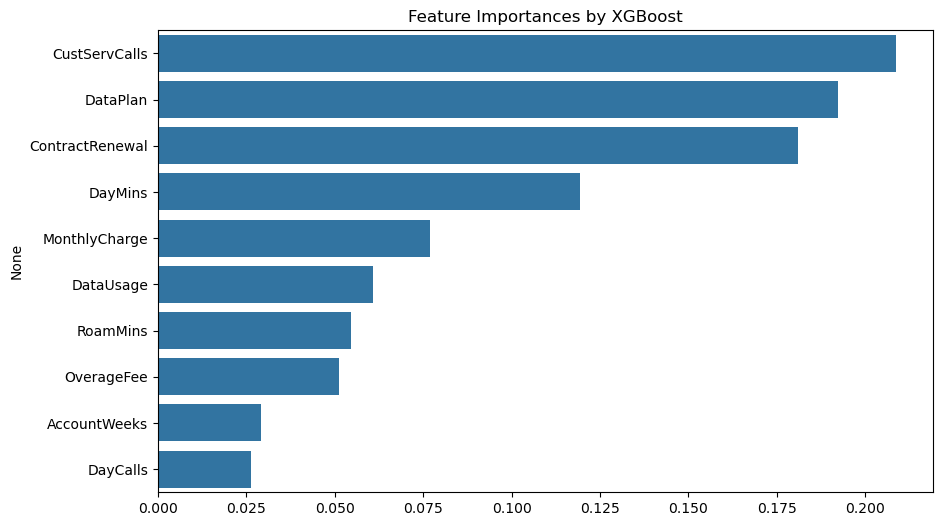

In [77]:
# Feature Importance for XGBoost
importances_xgb = xgb_best.feature_importances_
features = X.columns
indices_xgb = np.argsort(importances_xgb)[::-1]

plt.figure(figsize=(10, 6))
plt.title("Feature Importances by XGBoost")
sns.barplot(x=importances_xgb[indices_xgb], y=features[indices_xgb])
plt.show()


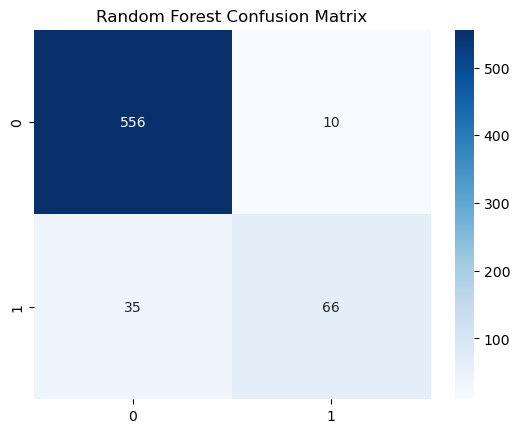

In [43]:
cm_rf = confusion_matrix(y_test, y_pred_rf)
sns.heatmap(cm_rf, annot=True, fmt="d", cmap="Blues")
plt.title("Random Forest Confusion Matrix")
plt.show()

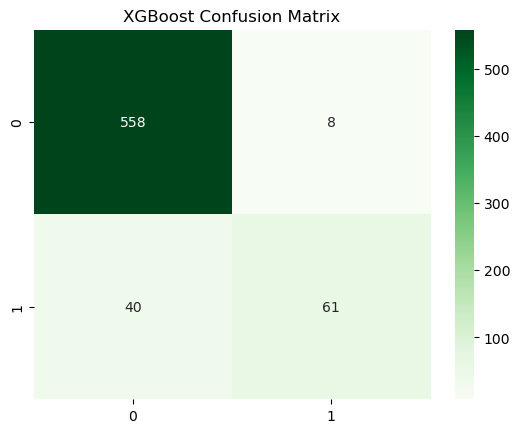

In [45]:
cm_xgb = confusion_matrix(y_test, y_pred_xgb)
sns.heatmap(cm_xgb, annot=True, fmt="d", cmap="Greens")
plt.title("XGBoost Confusion Matrix")
plt.show()

In [47]:
roc_rf = roc_auc_score(y_test, y_pred_rf)
roc_xgb = roc_auc_score(y_test, y_pred_xgb)
print(f"ROC AUC for Random Forest: {roc_rf}")
print(f"ROC AUC for XGBoost: {roc_xgb}")


ROC AUC for Random Forest: 0.8178987510058426
ROC AUC for XGBoost: 0.7949130602106148


In [49]:
print(f"Random Forest Accuracy: {accuracy_rf}")
print(f"XGBoost Accuracy: {accuracy_xgb}")

Random Forest Accuracy: 0.9325337331334332
XGBoost Accuracy: 0.9280359820089955


In [101]:
models = [rf_model, xgb_model]
model_names = [ "Random Forest", "XGBoost"]

for model in models:
    model.fit(X_train, y_train)

# Evaluate models
model_results = {}
metrics = ["accuracy", "precision"]

for model, name in zip(models, model_names):
    y_pred = model.predict(X_test)

    model_results[name] = {
        "accuracy": accuracy_score(y_test, y_pred),
        "roc_auc": roc_auc_score(y_test, y_pred)
    }

# Display the results in a formatted table
print("Model Comparison Table:")
print("{:<25} | {:<10} | {:<10} |".format(*("Algorithm", *metrics)))
print("-" * 53)

for name, results in model_results.items():
    print("{:<25} | {:<10.2f} | {:<10.2f} |".format(name, *results.values()))

Model Comparison Table:
Algorithm                 | accuracy   | precision  |
-----------------------------------------------------
Random Forest             | 0.93       | 0.80       |
XGBoost                   | 0.92       | 0.80       |
